

# Project: TMDb movie dataset investigation 


## Author: Robert HROMADA (SVK)

### Table of Contents
    
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#resources">Resources</a></li>
</ul>


<a id='intro'></a>
## Introduction

This Project is part of <a href="https://www.udacity.com/course/data-analyst-nanodegree--nd002\"> Data Analyst Nanodegree Program</a>, Lesson: Introduction to Data Analysis.
    
For this project the provided IMDb data set <a href="#[1]">[1]</a> was used. This dataset contains information about 10,000 movies collected from The Movie Database (<a href="https://www.themoviedb.org\">IMDb</a>), including user ratings and revenue.

The Movie Database (TMDb) is a community built movie and TV database. Every piece of data has been added by our amazing community dating back to 2008. TMDb's strong international focus and breadth of data is largely unmatched <a href="#[2]">[2]</a>.

My goal is analyse budget, revenue, vote_average <a href="#[3]">[3]</a> and the relationship between these values of the provided IMDb dataset.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
#read data set
df_wholeDB = pd.read_csv('tmdb-movies.csv')

#basic information about data set
df_wholeDB.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
#basic information about data set
df_wholeDB.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

My analyse is focusing on financial aspect of movies therefore following columns should be deleted.

|No.|Column|Non-Null|Reason *|
|---|---|---|---|
|1|imdb_id|10856|just Id number within IMDb database, it is not important for further analysis|
|6|cast|10790|cast does not have any value for analysis|
|7|homepage|2936|a lot of datas is missing and homepage of the movie does not have any value for analysis|
|8|director|10822|director of the movie does not have any value for analysis|
|9|tagline|8042|tagline of the movie does not have any value for analysis|
|10|keywords|9373|keywords of the movie does not have any value for analysis|
|11|overwiev|10862|owerview of the movie does not have any value for analysis|
|13|genres|10843|genres does not have any value for analysis|
|14|production_companies|9836|production company of the movie does not have any value for analysis|
|15|release_date|10866|for purpose of this project it is enogh to have data from "release_year" column|



*All data mentioned in table above could have value for other analysis.

Because one of my project focus will be financial aspects I have to check how many zero values I have in data set espetialy in columns: budget, revenue, budget_adj and revenue_adj.

In [4]:
#Count how many zero values is in dataset
df_wholeDB[df_wholeDB==0].count()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

We can see a lot of zero values in column which I interested in.

There are two oprtion how to deal with this situation. One is to fill these rows with the mean. Due to fact that the badget has high viriability,there is high risk that this aproach will highly affected analysis. Therefore better aproach in this case is to dropping off these rows. It is better to have less data with precise figures than have large data with skewed results.

### Data Cleaning

In [5]:
# Firstly I drop of unusefull columns and create version No. 1 of data set

df_DBver1 = df_wholeDB.drop(['imdb_id','cast','homepage','director','tagline','keywords','overview','genres','production_companies','release_date'], 1)
df_DBver1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   runtime         10866 non-null  int64  
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
 9   budget_adj      10866 non-null  float64
 10  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 933.9+ KB


In [6]:
# Secondly I drop of rows with value "0" in columns budger and revenue. From columns budget_adj and 
# revenue_adj row will be deleted as well due to fact that if budget is 0 that budget_adj is 0 as well.
# I will use column "revenue" due to fatc there is more zeros than in "budget" column

df_DBver2 = df_DBver1.query('revenue > 0')
df_DBver2[df_DBver2==0].count()


id                  0
popularity          0
budget            995
revenue             0
original_title      0
runtime             0
vote_count          0
vote_average        0
release_year        0
budget_adj        995
revenue_adj         0
dtype: int64

In [7]:
# As we can see we still have some zero values in column "budget" therefore I will perform same operation again
#but now with "budget" column

df_DBver3 = df_DBver2.query('budget > 0')
df_DBver3[df_DBver3==0].count(), df_DBver3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3855 non-null   int64  
 1   popularity      3855 non-null   float64
 2   budget          3855 non-null   int64  
 3   revenue         3855 non-null   int64  
 4   original_title  3855 non-null   object 
 5   runtime         3855 non-null   int64  
 6   vote_count      3855 non-null   int64  
 7   vote_average    3855 non-null   float64
 8   release_year    3855 non-null   int64  
 9   budget_adj      3855 non-null   float64
 10  revenue_adj     3855 non-null   float64
dtypes: float64(4), int64(6), object(1)
memory usage: 361.4+ KB


(id                0
 popularity        0
 budget            0
 revenue           0
 original_title    0
 runtime           0
 vote_count        0
 vote_average      0
 release_year      0
 budget_adj        0
 revenue_adj       0
 dtype: int64,
 None)

Next cleaning step is to clean database from micro-budget and low budget films. Based on article "What’s the average budget of a low or micro-budget film?" published on September 22, 2014 <a href="#[4]">[4]</a>, $396,000 was deemed the maximum budget for a "micro-budget" film is approx. 400 000 USD and 2.1 million for “low budget”.

Therefore I decided to drop off all movies with adjusted budget bellow 2.1 million USD.

In [8]:
df_DBver4 = df_DBver3.query('budget_adj > 2100000')
df_DBver4.min()['budget_adj']

2103337.16526309

#### Summary of dataset available for analysis

* **df_wholeDB** - contains all data
* **df_DBver4** - cleaned version of original data set, contains only rows where "budget" and "revenue" are not null or empty

<a id='eda'></a>
## Exploratory Data Analysis


### Q1: How has the average rating been changing within the years?

For this question I have used the whole database due to the fact, that all movies contain "vote_average" <a href="#[3]">[3]</a> data  . Our movie data set contains movies from 1960 till 2015. The total number of produced movies has increased since 1960 till now.

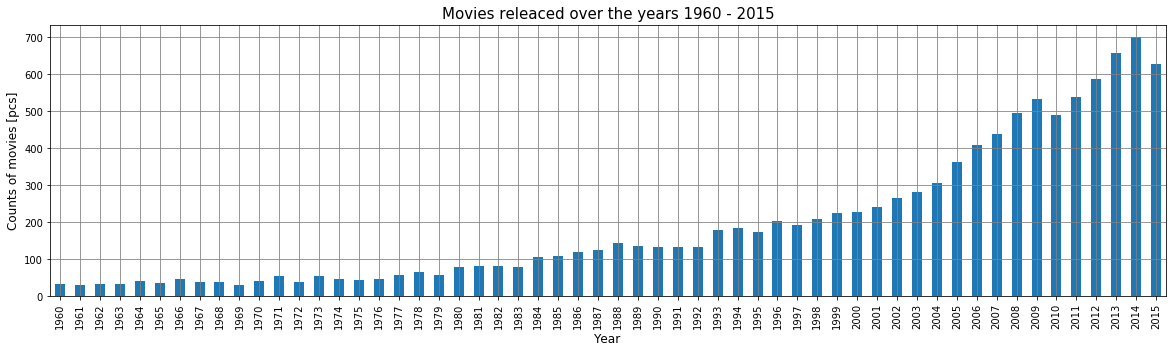

In [11]:
# Total numbers of produced movies over the yerasype

releasedMovies = df_wholeDB.groupby(['release_year']).original_title.count()

releasedMovies.plot(kind='bar' )

# Plot formatting
plt.title('Movies releaced over the years 1960 - 2015', fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Counts of movies [pcs]",fontsize=12);

plt.rcParams['figure.figsize'] = 20, 5
plt.rc('grid', linestyle="-", color='gray')

plt.grid()


We can see that from 1960 to 1983 numbers of movie was kept bellow 100. From 1984 till 2000 numbers of produced movies was approx. doubled. Next fifteen year, from 2001 till 2015 movie companies year by year intensively increase their production. In 2014 movie production was seven times more than in 1960.

One of the reason could be technotology development of our society.

We will look how "vote_average" <a href="#[3]">[3]</a> change over the years and how this rating made by registered users of IMDb changed over the years.

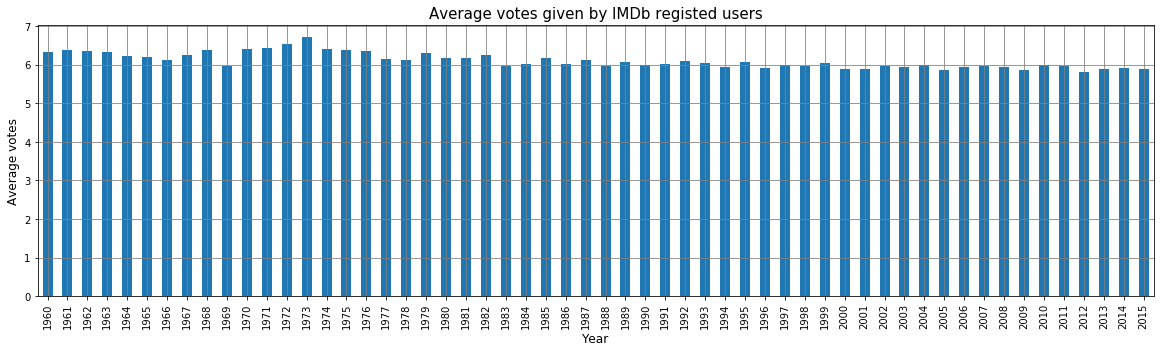

In [13]:
# IMDb customers rating of produced movies over the years
userVotes = df_wholeDB.groupby(['release_year']).vote_average.mean()

userVotes.plot(kind='bar' )

# Plot formatting
plt.title('Average votes given by IMDb registed users', fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average votes",fontsize=12);

plt.rcParams['figure.figsize'] = 20, 5
plt.rc('grid', linestyle="-", color='gray')

plt.grid()

It is really iteresting to see that average is almost same over the years.

How exactly is distributed we can see from histogram.

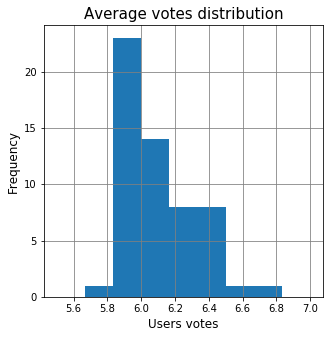

In [19]:
# IMDb customers rating of produced movies over the years

userVotes = df_wholeDB.groupby(['release_year']).vote_average.mean()

userVotes.hist( bins=np.linspace(5.5, 7, 10), grid=True, label='Whole DB')


# Plot formatting
plt.title('Average votes distribution', fontsize=15)
plt.xlabel("Users votes", fontsize=12)
plt.ylabel("Frequency", fontsize=12);

plt.rcParams['figure.figsize'] = 5, 5




### Q2:How the movie budget is translated into rating and revenue?
For this question I have used the database cleaned from zero values in budget and revenue columns (df_DBver3).

Due to fact that this data set is provided by IMDb.com I expected that budget and revenue value are in USD.

Secondly, real value of USD was diffrent in 1960 and during next following years. Therefore I have used adjusted budget and revenue data from column marked as budget_adj and revenue_adj.


In [20]:
df_DBver4.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3657.000000,3657.000000,3.657000e+03,3.657000e+03,3657.000000,3657.000000,3657.000000,3657.000000,3.657000e+03,3.657000e+03
mean,38994.594750,1.227057,3.917776e+07,1.128117e+08,109.911403,547.435056,6.167241,2001.179929,4.658608e+07,1.434248e+08
std,66418.881868,1.501141,4.244393e+07,1.796812e+08,19.851495,897.042470,0.791609,11.300931,4.481698e+07,2.198025e+08
min,5.000000,0.010335,5.000000e+05,2.000000e+00,26.000000,10.000000,2.200000,1960.000000,2.103337e+06,2.370705e+00
25%,5852.000000,0.481089,1.200000e+07,1.617896e+07,96.000000,76.000000,5.700000,1995.000000,1.551037e+07,2.176920e+07
50%,11158.000000,0.834109,2.500000e+07,4.962778e+07,106.000000,216.000000,6.200000,2004.000000,3.219999e+07,6.680736e+07
75%,37799.000000,1.414590,5.000000e+07,1.314577e+08,120.000000,600.000000,6.700000,2010.000000,6.284215e+07,1.718192e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [21]:
# median for"average_vote" column

df_DBver4['vote_average'].median()

6.2

We can easily recognize huge diffrence between min a max value.


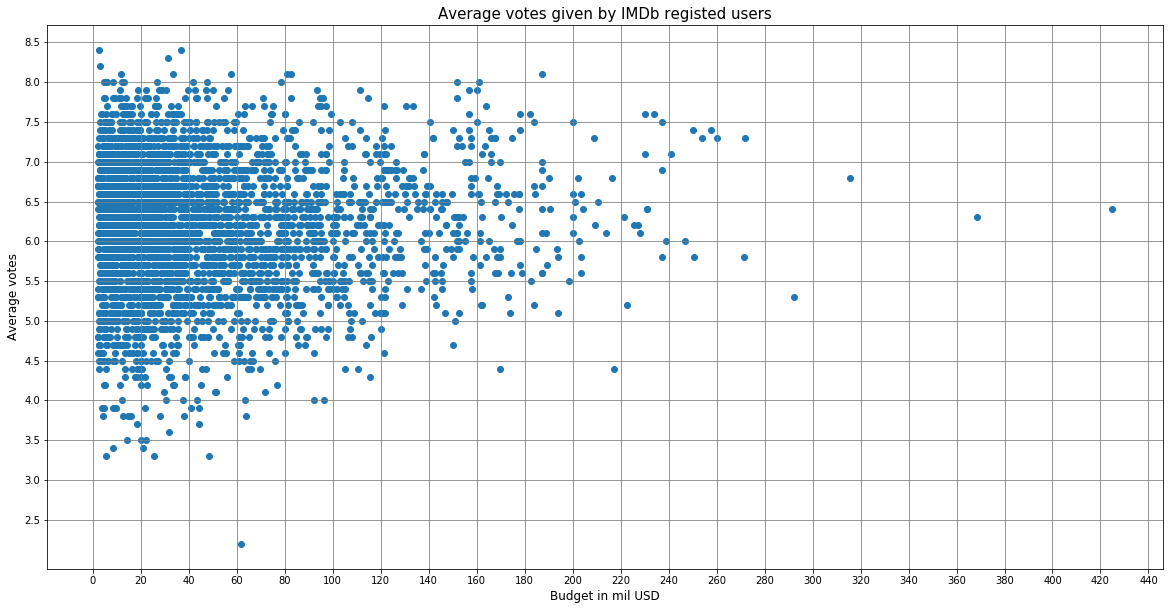

In [22]:
# Average votes given by IMDb registed users

x = df_DBver4['budget_adj']/1000000
y = df_DBver4['vote_average']

plt.rcParams['figure.figsize'] = 20, 10

plt.scatter(x, y)

# Plot formatting
plt.title('Average votes given by IMDb registed users', fontsize=15)
plt.xlabel("Budget in mil USD", fontsize=12)
plt.ylabel("Average votes",fontsize=12);

plt.xticks(np.arange(0, 460, 20)) 
plt.yticks(np.arange(2.5, 9, 0.5)) 

plt.grid()


We can see from the plot that there is no exact relation between budget and received votes from IMDb users. In the IMDb database there are a lot of movies with relatively low budget (up to 20 mil. USD) with rating above 7.5 (median = 6.2).

On the other hand, we have very high budget movie (budget more than 240 mil. USD) with average rating

We can say that there is no reason for producers to think that with high amount of invested money they will receive better customers rating.



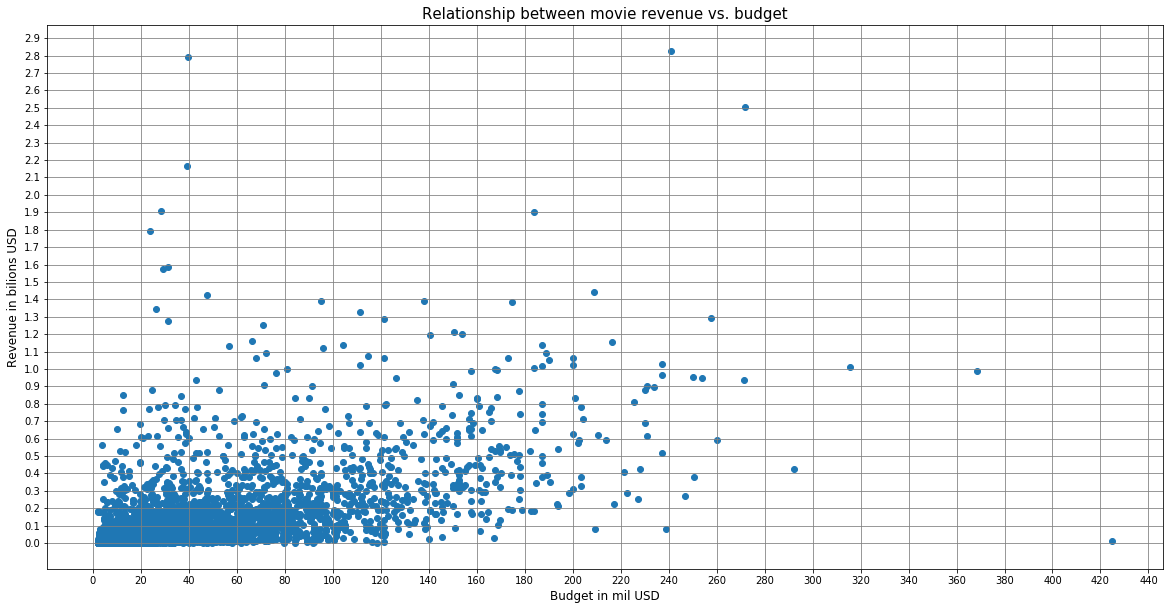

In [23]:
# Relationship between movie revenue vs. budget

x = df_DBver4['budget_adj']/1000000
y = df_DBver4['revenue_adj']/1000000000

plt.scatter(x, y)

# Plot formatting
plt.title('Relationship between movie revenue vs. budget', fontsize=15)
plt.xlabel("Budget in mil USD", fontsize=12)
plt.ylabel("Revenue in bilions USD",fontsize=12);

plt.xticks(np.arange(0, 460, 20)) 
plt.yticks(np.arange(0, 3, .1)) 

plt.grid()

Based on the plot there is no relation between revenue and budget. 

For better overview We can define profit_ratio coefficient which is calculated as revenue_adj / budget_adj.
Value above 1 means that movie earns money, bigger number = bigger profit for company and of course value bellow 1 means that movie produce lost.


In [24]:
# Relationship between movie revenue vs. budget
# create the profit_ratio coeficient as profit_ratio = revenue / budget

df_DBver4['profit_ratio'] = df_DBver4['revenue_adj']/df_DBver4['budget_adj']
df_DBver4.head(5)


C:\Utils\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_ratio
0,135397,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,2015,1.379999e+08,1.392446e+09,10.090192
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,2015,1.379999e+08,3.481613e+08,2.522909
2,262500,13.112507,110000000,295238201,Insurgent,119,2480,6.3,2015,1.012000e+08,2.716190e+08,2.683984
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,5292,7.5,2015,1.839999e+08,1.902723e+09,10.340891
4,168259,9.335014,190000000,1506249360,Furious 7,137,2947,7.3,2015,1.747999e+08,1.385749e+09,7.927628


In [25]:
# Five lowest profit ratio

df_DBver4.nsmallest(5,['profit_ratio'])

,id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_ratio
10307,2259,0.450208,25000000,6,The House of the Spirits,140,52,6.7,1993,3.773675e+07,9.056820,2.400000e-07
5067,13537,0.462609,6000000,2,Shattered Glass,94,46,6.4,2003,7.112116e+06,2.370705,3.333333e-07
8142,2293,0.552091,6000000,2,Mallrats,94,201,6.8,1995,8.585801e+06,2.861934,3.333333e-07
8523,9431,0.578849,15000000,5,Bordello of Blood,87,27,4.9,1996,2.085325e+07,6.951084,3.333333e-07
7158,14844,0.420568,23000000,12,Chasing Liberty,111,86,6.2,2004,2.655224e+07,13.853345,5.217391e-07


In [26]:
# Five largest profit ratio

df_DBver4.nlargest(5,['profit_ratio'])

,id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_ratio
10606,838,0.684079,777000,115000000,American Graffiti,110,145,6.5,1973,3.815971e+06,5.647834e+08,148.005148
10174,1366,2.389663,1100000,117235147,Rocky,119,963,7.2,1976,4.214868e+06,4.492097e+08,106.577406
10597,9461,0.993066,850000,90000000,Enter the Dragon,99,279,7.0,1973,4.174486e+06,4.420044e+08,105.882353
9808,36685,1.409947,1200000,112892319,The Rocky Horror Picture Show,100,332,7.1,1975,4.862185e+06,4.574195e+08,94.076933
10757,923,1.210531,650000,55000000,Dawn of the Dead,127,306,7.2,1978,2.172755e+06,1.838485e+08,84.615385


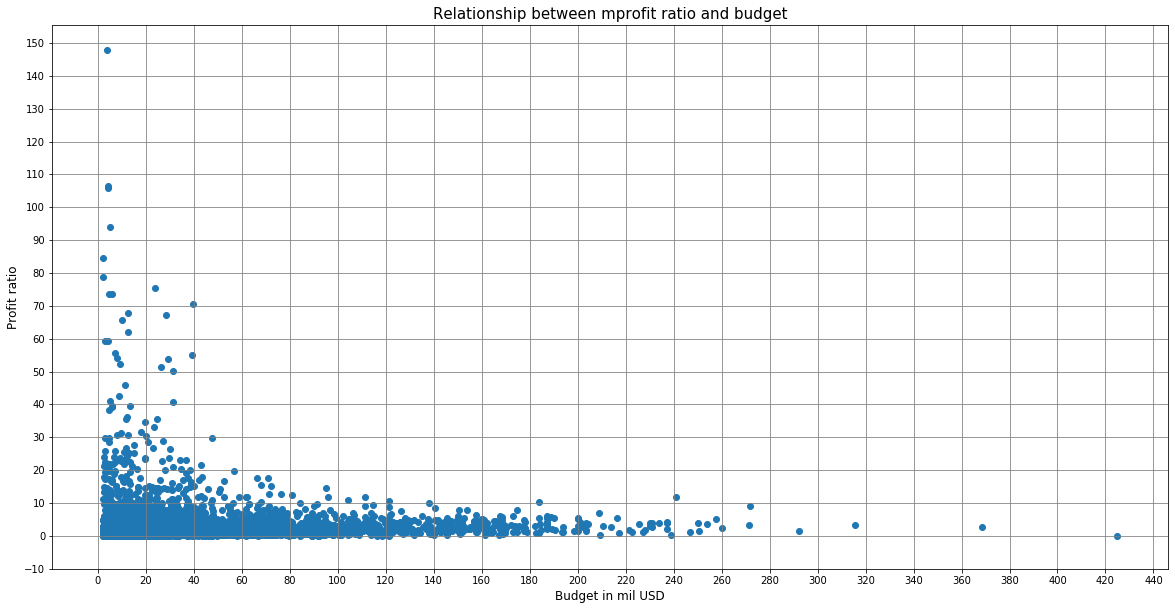

In [27]:
# Relationship between profit ratio vs. budget

x = df_DBver4['budget_adj']/1000000
y = df_DBver4['profit_ratio']

plt.scatter(x, y)

# Plot formatting
plt.title('Relationship between mprofit ratio and budget', fontsize=15)
plt.xlabel("Budget in mil USD", fontsize=12)
plt.ylabel("Profit ratio",fontsize=12);

plt.rcParams['figure.figsize'] = 20, 10

plt.xticks(np.arange(0, 460, 20)) 
plt.yticks(np.arange(-10, 160, 10)) 

plt.grid()

From the plot we can say that there are few movies with really high profit ratio which means that these movies made big profit for producing company with minimal investment.

On the other hand we can observe that an numbers of movies with minimal profit.

<a id='conclusions'></a>
## Conclusions

Firstly, based on this analysis we have to say that first step has to be IMDb data validation. It is easily observed that in provided data set there are movies without budget and/or revenue information which were needed for this analysis.

Second very important observation is even if there are data for budger and/or revenue there looks like wrong. Especially when we look closer to five movies with the lowest profit ratio, revenue for these movies is up to 20 USD which looks strange.


Secondly, really interesting fact is that even movie production dramatically increase produced movies average customers rating is kept on the same level.

Thirdly, we can say that in the movie production history there are few blockbuster films which has really amazing profit ratio.
 

<a id='resources'></a>
## Resources

<a id="[1]">[1]</a> TMDb movie data (cleaned from original data on Kaggle) provided as <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv">official course material</a> 
.

<a id="[2]">[2]</a> <a href="https://www.themoviedb.org\">IMDb offical web page</a>


<a id="[3]">[3]</a> <a href="https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#ratings">IMDb ratings</a>

<a id="[4]">[4]</a> <a href="https://stephenfollows.com/average-budget-low-micro-budget-film/">What’s the average budget of a low or micro-budget film?</a>



